In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"

# MÔ TẢ DỮ LIỆU:
- Bộ dữ liệu được dùng trong bài này gồm 2 file: *WorldCupMatches.csv* và *WorldCups.csv* được mô tả chi tiết bên dưới.
- Chủ đề : Các trận đấu World Cup từ năm 1930 - 2014
- Dữ liệu được lấy từ kaggle.com (License: CC0: Public Domain)
- Nguồn gốc của dữ liệu này là từ FIFA World Cup Archive website: https://www.fifa.com/fifa-tournaments/archive/

# KHÁM PHÁ DỮ LIỆU

Đọc dữ liệu từ file WorldCupMatches.csv vào biến `match_data` và file WorldCups.csv vào biến `overall_data`

In [2]:
match_data = pd.read_csv('WorldCupMatches.csv', encoding='ISO-8859-1')
overall_data = pd.read_csv('WorldCups.csv')

## Tìm hiểu dữ liệu trong file WorldCupMatches.csv

In [3]:
match_data.head(3)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA


In [4]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

File **WorldCupMatches.csv** chứa thông tin của những trận đấu đã diễn ra:<br>
- Có 4572 dòng và 20 cột:<br>
&emsp;&emsp;+ **Year**: năm diễn ra <br>
&emsp;&emsp;+ **Datetime**: ngày giờ diễn ra trận đấu<br>
&emsp;&emsp;+ **Stage**: loại vòng đấu<br>
&emsp;&emsp;+ **Stadium**: sân vận động - nơi diễn ra trận đấu<br>
&emsp;&emsp;+ **City**: thành phố diễn ra trận đấu<br>
&emsp;&emsp;+ **Home Team Name**: tên đội nhà<br>
&emsp;&emsp;+ **Home Team Goals**: số bàn thắng đội nhà ghi được<br>
&emsp;&emsp;+ **Away Team Goals**: tên đội khách<br>
&emsp;&emsp;+ **Away Team Name**: số bàn thắng đội khách ghi được<br>
&emsp;&emsp;+ **Win conditions**: điều kiện thắng<br>
&emsp;&emsp;+ **Attendance**: số lượng khán giả<br>
&emsp;&emsp;+ **Half-time Home Goals**: số bàn thắng đội nhà ghi được trong hiệp 1<br>
&emsp;&emsp;+ **Half-time Away Goals**: số bàn thắng đội khách ghi được trong hiệp 1<br>
&emsp;&emsp;+ **Referee**: tên trọng tài<br>
&emsp;&emsp;+ **Assistant 1**: trợ lí trọng tài 1<br>
&emsp;&emsp;+ **Assistant 2**: trợ lí trọng tài 2<br>
&emsp;&emsp;+ **RoundID**: số hiệu vòng đấu<br>
&emsp;&emsp;+ **MatchID**: số hiệu trận đấu<br>
&emsp;&emsp;+ **Home Team Initials**: viết tắt tên đội nhà<br>
&emsp;&emsp;+ **Away Team Initials**: viết tắt tên đội khách<br>     

### Giải quyết các vấn đề của dữ liệu

- Chỉ có 852 dòng đầu tiên của dữ liệu có giá trị (các dòng còn lại đều là NaN), nên ta chỉ lấy 852 dòng đầu tiên:

In [5]:
match_data = match_data[:852]

- Chuyển đổi kiểu dữ liệu của cột **Datetime** sang kiểu *datetime*:

In [6]:
match_data['Datetime'] = pd.to_datetime(match_data['Datetime'])

### Miền giá trị của các cột numerical hoặc datetime

- Các cột numerical: **Year**, **Home Team Goals**, **Away Team Goals**, **Attendance**, **Half-time Home Goals**, **Half-time Away Goals**. <br>
- Các cột datetime: **Datetime** <br>
- Hai cột **RoundID** và **MatchID** tuy có kiểu dữ liệu float64 nhưng về mặt ý nghĩa, ta thấy đây là các biến catergorical.

In [7]:
numerical_col = ['Year', 'Datetime', 'Home Team Goals', 'Away Team Goals', 'Attendance', 'Half-time Home Goals', 'Half-time Away Goals']
col_ranges = pd.DataFrame(index = numerical_col, columns = ['min', 'max'])
col_ranges.loc[:, 'min'] = match_data[numerical_col].min()
col_ranges.loc[:, 'max'] = match_data[numerical_col].max()
col_ranges

,min,max
Year,1930,2014
Datetime,1930-07-13 15:00:00,2014-07-13 16:00:00
Home Team Goals,0,10
Away Team Goals,0,7
Attendance,2000,173850
Half-time Home Goals,0,6
Half-time Away Goals,0,5


### Các giá trị có thể có của các cột catergorical

In [8]:
cat_columns = ['Stage', 'Stadium', 'City', 'Home Team Name', 'Away Team Name','Win conditions','Referee',\
               'Assistant 1','Assistant 2','Home Team Initials','Away Team Initials']
cat_col_ranges = pd.DataFrame(columns = ['Num. of Unique Values', '3 First Values'], index = cat_columns)
cat_col_ranges.iloc[:, 0] = match_data[cat_columns].nunique()
for x in cat_columns:
    cat_col_ranges.loc[x, '3 First Values'] = ', '.join(list(np.sort(match_data[x].unique())[:3]))
cat_col_ranges

,Num. of Unique Values,3 First Values
Stage,23,"Final, First round, Group 1"
Stadium,181,"Arena Amazonia, Arena Fonte Nova, Arena Pantanal"
City,151,"Alicante , Antibes , Arica"
Home Team Name,78,"Algeria, Angola, Argentina"
Away Team Name,83,"Algeria, Angola, Argentina"
Win conditions,43,", win on penalties (2 - 3) , win on penalti..."
Referee,366,"ABD EL FATAH Essam (EGY), ADAIR John (NIR), AG..."
Assistant 1,387,"ABDUL HAMID Halim (MAS), ACHIK Redouane (MAR),..."
Assistant 2,408,"ABDUL HAMID Halim (MAS), ACKEBORN Gosta (SWE),..."
Home Team Initials,77,"ALG, ANG, ARG"


## Tìm hiểu dữ liệu trong file WorldCups.csv

In [9]:
overall_data

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


In [10]:
overall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


File **WorldCups.csv** chứa kết quả của những kì World Cup đã diễn ra:<br>
- Có 20 dòng và 10 cột:<br>
&emsp;&emsp;+ **Year**: năm diễn ra <br>
&emsp;&emsp;+ **Country**: nước chủ nhà<br>
&emsp;&emsp;+ **Winner**: đội vô địch<br>
&emsp;&emsp;+ **Runners-Up**: đôi á quân<br>
&emsp;&emsp;+ **Third**: đội về ba<br>
&emsp;&emsp;+ **Fourth**: đội về tư<br>
&emsp;&emsp;+ **GoalsScored**: tổng số bàn thắng được ghi<br>
&emsp;&emsp;+ **QualifiedTeams**: tổng số đội tham dự<br>
&emsp;&emsp;+ **MatchesPlayed**: tổng số trận đấu đã diễn ra<br>
&emsp;&emsp;+ **Attendance**: tổng số khán giả<br>

### Giải quyết các vấn đề của dữ liệu:

- Cột **Attendance** hiện tại đang là kiểu *object*, nhưng về ý nghĩa cột này chỉ số lượng khán giả nên ta sẽ chuyển về kiểu số nguyên. Nhưng do những giá trị này có chứa dấu nhiều dấu "." nên thao tác này sẽ bị lỗi, nên trước tiên ta sẽ loại bỏ những dấu "." này bằng cách replace chúng thành những chuỗi rỗng rồi mới thực hiện chuyển đổi:

In [11]:
overall_data['Attendance'] = overall_data['Attendance'].apply(lambda x: x.replace('.', ''))

In [12]:
overall_data['Attendance'] = overall_data['Attendance'].astype('int64')

### Miền giá trị của các cột numerical

Gồm các cột: **Year**, **GoalsScored**, **QualifiedTeams**, **MatchesPlayed**, **Attendance** <br>

In [13]:
numerical_col = ['Year', 'GoalsScored', 'QualifiedTeams', 'MatchesPlayed', 'Attendance']
col_ranges = pd.DataFrame(index = numerical_col, columns = ['min', 'max'])
col_ranges.loc[:, 'min'] = overall_data[numerical_col].min()
col_ranges.loc[:, 'max'] = overall_data[numerical_col].max()
col_ranges

,min,max
Year,1930,2014
GoalsScored,70,171
QualifiedTeams,13,32
MatchesPlayed,17,64
Attendance,363000,3587538


### Các giá trị có thể có của các cột catergorical

In [14]:
cat_columns = ['Country', 'Winner', 'Runners-Up', 'Third', 'Fourth']
cat_col_ranges = pd.DataFrame(columns = ['Num. of Unique Values', '3 First Values'], index = cat_columns)
cat_col_ranges.iloc[:, 0] = overall_data[cat_columns].nunique()
for x in cat_columns:
    cat_col_ranges.loc[x, '3 First Values'] = ', '.join(list(np.sort(overall_data[x].unique())[:3]))
cat_col_ranges

,Num. of Unique Values,3 First Values
Country,15,"Argentina, Brazil, Chile"
Winner,9,"Argentina, Brazil, England"
Runners-Up,10,"Argentina, Brazil, Czechoslovakia"
Third,14,"Austria, Brazil, Chile"
Fourth,16,"Austria, Belgium, Brazil"


# ĐƯA RA CÁC CÂU HỎI

## 1. TOP CÁC QUỐC GIA CÓ THÀNH TÍCH TỔNG CAO NHẤT CÁC KÌ WORLD CUP?

## Sử dụng dữ liệu trong file WorldCups.csv
## a. Tiền xử lí dữ liệu: 
- Tạo 3 series `winners`, `runner_ups`, `third` (index là tên nước, 1 columns) đếm số lần các nước đạt rank 1, rank 2 và rank 3 từ 3 cột Winner, Runner-ups và Third
- Merge 3 series đó lại thành 1 bảng dữ liệu `top3_df` theo tên các nước tương ứng (tức là theo index).
- Lúc này có 1 vài giá trị sẽ là NaN do không phải nước nào cũng đều đã từng nằm trong cả 3 thứ hạng -> fill những giá trị này bằng 0.
- Tạo thêm cột **Total** cho `top3_df` bằng cách tính tổng 3 cột đã tính trước đó. Về mặt ý nghĩa, cột này cho biết **tổng số lần vào top 3 của mỗi nước**. 
- Sắp xếp giảm dần giá trị cột **Total**

## b. Phân tích dữ liệu:
- Ta biểu diễn biến `top3_df` bằng biểu đồ cột chồng.
- Ở đây ta chỉ biểu diễn các nước đã từng vô địch WC chứ không biểu diễn tất cả các dòng trong `top3_df`. Các nước này được lưu vào biến `championship`.
- Mỗi nước sẽ được biểu diễn bằng một cột lớn có 3 cột con chồng lên nhau thể hiện cho số lần đạt hạng 1, hạng 2 và hạng 3. Đồng thời, chiều dài của cột lớn (tức là tổng 3 cột con) thể hiện số lần giành được huy chương của nước đó trong các kì world cup (tất nhiên nằm trong top 3 là sẽ có huy chương)
- Từ biểu đồ trên ta có thể suy ra được nước nào có thành tích cao nhất qua các mùa World Cup.

In [15]:
winners = overall_data['Winner'].value_counts()
runner_ups = overall_data['Runners-Up'].value_counts()
third = overall_data['Third'].value_counts()

In [16]:
top2_df = winners.to_frame().merge(runner_ups.to_frame(), left_index=True, right_index=True, how='outer')
top3_df = top2_df.merge(third.to_frame(), left_index=True, right_index=True, how = 'outer')
top3_df.fillna(0, inplace = True)
top3_df['Total'] = top3_df.values.sum(axis = 1)
top3_df.sort_values(by = 'Total', ascending = False, inplace = True)
top3_df

,Winner,Runners-Up,Third,Total
Brazil,5.0,2.0,2.0,9.0
Germany FR,3.0,3.0,1.0,7.0
Italy,4.0,2.0,1.0,7.0
Argentina,2.0,3.0,0.0,5.0
Germany,1.0,1.0,3.0,5.0
Netherlands,0.0,3.0,1.0,4.0
France,1.0,1.0,2.0,4.0
Sweden,0.0,1.0,2.0,3.0
Poland,0.0,0.0,2.0,2.0
Hungary,0.0,2.0,0.0,2.0


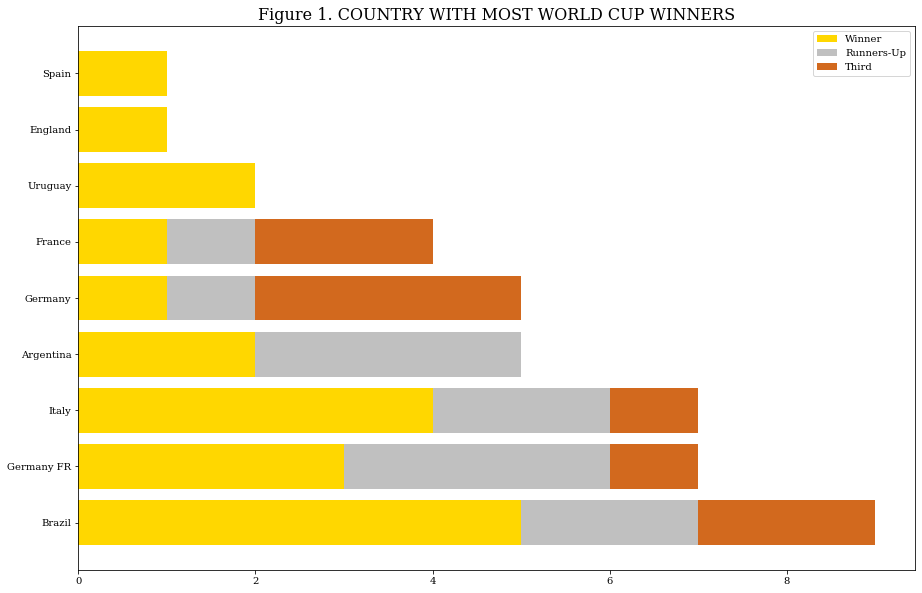

In [17]:
fig, ax = plt.subplots(figsize = (15, 10))
championship = top3_df[top3_df['Winner'] >=1].index
tmp = top3_df.loc[championship, :]
ax.barh(tmp.index, tmp['Winner'], color = 'gold', label = 'Winner')
ax.barh(tmp.index, tmp['Runners-Up'], left = tmp['Winner'], color = 'silver', label = 'Runners-Up')
ax.barh(tmp.index, tmp['Third'], left = tmp['Winner'] + tmp['Runners-Up'], color = 'chocolate', label = 'Third')
ax.set_title('Figure 1. COUNTRY WITH MOST WORLD CUP WINNERS', fontsize = 16)
ax.legend()

## Nhận xét:
- Brazil, Ý và CHLB Đức là 3 quốc gia có số lần vô địch World Cup nhiều nhất, đồng thời cũng là 3 nước vào top 3 nhiều nhất các kì World Cup. Có thể thấy đây chính là 3 nước có thành tích cao nhất các mùa World Cup về mọi mặt.
- Anh, Tây Ban Nha và Pháp đều có 1 lần vô địch World Cup. Tuy nhiên số lần vào top 3 của Pháp lại nhiều hơn hẳn so với 2 nước còn lại, thậm chí cao hơn cả Uruguay (đội từng có 2 lần vô địch, đang giữ vị trí thứ 4 trên BXH). Nên nhìn chung có thể đánh giá thực lực của Pháp là cao hơn so với các nước này.

# 2. QUỐC GIA NÀO GHI ĐƯỢC NHIỀU BÀN THẮNG NHẤT TRONG TẤT CẢ CÁC MÙA WORLD CUP?

In [18]:
home_team = match_data[['Home Team Name', 'Home Team Goals']].groupby(['Home Team Name']).agg('sum')
away_team = match_data[['Away Team Name', 'Away Team Goals']].groupby(['Away Team Name']).agg('sum')

In [19]:
goals = home_team.merge(away_team, left_index = True, right_index = True, how = 'outer')
goals['Total'] = goals.sum(axis = 1)
goals.sort_values(ascending = False, inplace = True, by = 'Total')
goals.fillna(0, inplace = True)
goals

,Home Team Goals,Away Team Goals,Total
Brazil,180.0,45.0,225.0
Argentina,111.0,22.0,133.0
Germany FR,99.0,32.0,131.0
Italy,99.0,29.0,128.0
France,68.0,40.0,108.0
...,...,...,...
Dutch East Indies,0.0,0.0,0.0
China PR,0.0,0.0,0.0
Canada,0.0,0.0,0.0
Zaire,0.0,0.0,0.0


Text(0.5, 1.0, 'Figure 2. TOP COUNTRY HAS MOST GOALS AT WORLD CUP')

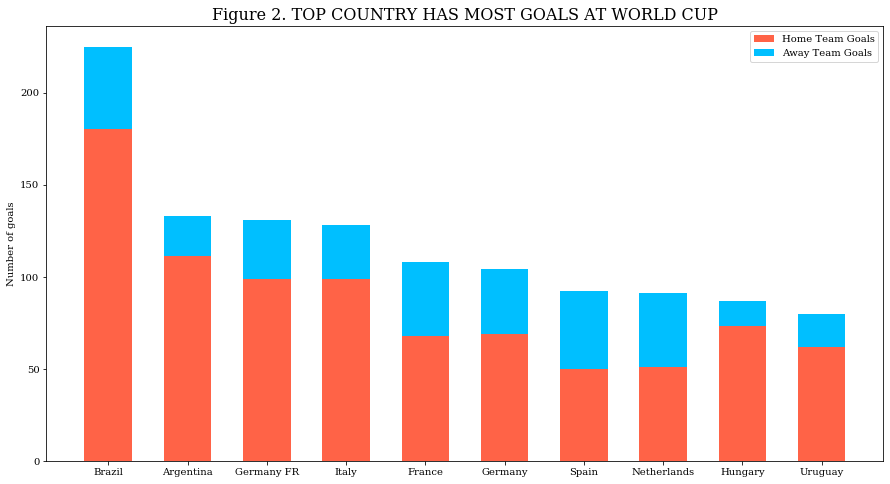

In [20]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(goals.index[:10], goals['Home Team Goals'][:10], color = 'tomato', width = np.repeat(0.6, 10), label = 'Home Team Goals')
ax.bar(goals.index[:10], goals['Away Team Goals'][:10], bottom = goals['Home Team Goals'][:10],\
       color = 'deepskyblue', width = np.repeat(0.6, 10), label = 'Away Team Goals')
ax.set_ylabel('Number of goals')
ax.legend()
ax.set_title('Figure 2. TOP COUNTRY HAS MOST GOALS AT WORLD CUP', fontsize = 16)

# 3. NHỮNG TRẬN ĐẤU CỦA QUỐC GIA NÀO CÓ TỔNG LƯỢT NGƯỜI XEM CAO NHẤT?

In [21]:
match_data.head(5)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,1930-07-14 14:50:00,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,1930-07-15 16:00:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [71]:
country = np.unique(np.append(match_data['Home Team Name'].unique(), match_data['Away Team Name'].unique()))
attendance_by_year = pd.DataFrame(index = match_data['Year'].unique(), columns = country)

home_att = match_data.pivot_table(index = 'Year', columns = 'Home Team Name', values = 'Attendance', aggfunc = 'mean').fillna(0)
away_att = match_data.pivot_table(index = 'Year', columns = 'Away Team Name', values = 'Attendance', aggfunc = 'mean').fillna(0)

match_by_year = match_data.groupby('Year').agg('sum')
for x in country:
    attendance_by_year.loc[:, x] = match_data[match_data['Home Team Name'] == x].groupby('Year')['Attendance'].sum()\
    + match_data[match_data['Away Team Name'] == x].groupby('Year')['Attendance'].sum()
attendance_by_year 
match_by_year

,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
Year,,,,,,,
1930.0,59.0,11.0,590549.0,27.0,5.0,3.824000e+03,1.966500e+04
1934.0,48.0,22.0,363000.0,20.0,9.0,1.768700e+04,1.905200e+04
1938.0,61.0,23.0,375700.0,20.0,10.0,1.795200e+04,2.091600e+04
1950.0,69.0,19.0,1045246.0,33.0,8.0,4.582000e+03,2.649000e+04
1954.0,109.0,31.0,768607.0,46.0,13.0,1.253900e+04,3.302200e+04
1958.0,88.0,38.0,819810.0,34.0,20.0,1.476500e+04,4.836100e+04
1962.0,69.0,20.0,893172.0,29.0,10.0,1.446100e+04,4.770900e+04
1966.0,69.0,20.0,1563135.0,29.0,11.0,1.469700e+04,5.238300e+04
1970.0,72.0,23.0,1603975.0,21.0,11.0,1.509500e+04,5.847900e+04
